In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [3]:
def analyze(X, y, feature_names):
    # Split data into training and testing datasets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
    
    # AdaBoost Regressor model
    regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
    regressor.fit(X_train, y_train)
    
    # Evaluate performance of AdaBoost regressor
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred )
    print("\nADABOOST REGRESSOR")
    print("Mean squared error =", round(mse, 2))
    print("Explained variance score =", round(evs, 2))
    
    # Extract feature importances
    feature_importances = regressor.feature_importances_
    
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    
    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))
    
    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure(figsize=(10,10))
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted], fontsize=8)
    plt.ylabel('Relative Importance')
    plt.title('Feature importance using AdaBoost regressor')
    plt.show()

#### Boston information
- Variables in order:
  - CRIM:      per capita crime rate by town
  - ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS    proportion of non-retail business acres per town
  - CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - NOX:       nitric oxides concentration (parts per 10 million)
  - RM:        average number of rooms per dwelling
  - AGE:       proportion of owner-occupied units built prior to 1940
  - DIS:       weighted distances to five Boston employment centres
  - RAD:       index of accessibility to radial highways
  - TAX:       full-value property-tax rate per $10,000
  - PTRATIO  pupil-teacher ratio by town
  - B:         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  - LSTAT    % lower status of the population
  - MEDV:      Median value of owner-occupied homes in $1000's


ADABOOST REGRESSOR
Mean squared error = 22.7
Explained variance score = 0.79


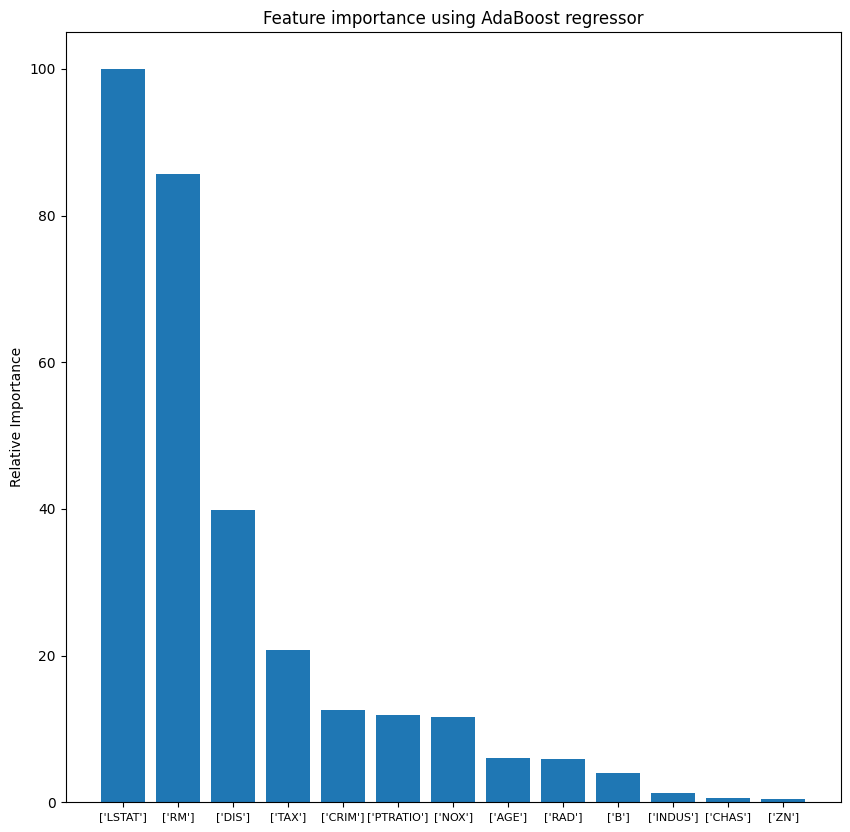

In [4]:
import pandas as pd

data_url = '../aiwp-data/boston_kaggle.csv'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_df = pd.read_csv(data_url, delimiter=r"\s+", names=columns)

column_sels = columns[:-1]
data, target = raw_df.loc[:, column_sels], raw_df['MEDV']
data, target = data.to_numpy(), target.to_numpy()

# Shuffle the data
X, y = shuffle(data, target, random_state=7)

feature_names = np.array(columns).reshape((-1, 1))

analyze(X, y, feature_names)

#### California Housing


ADABOOST REGRESSOR
Mean squared error = 1.18
Explained variance score = 0.47


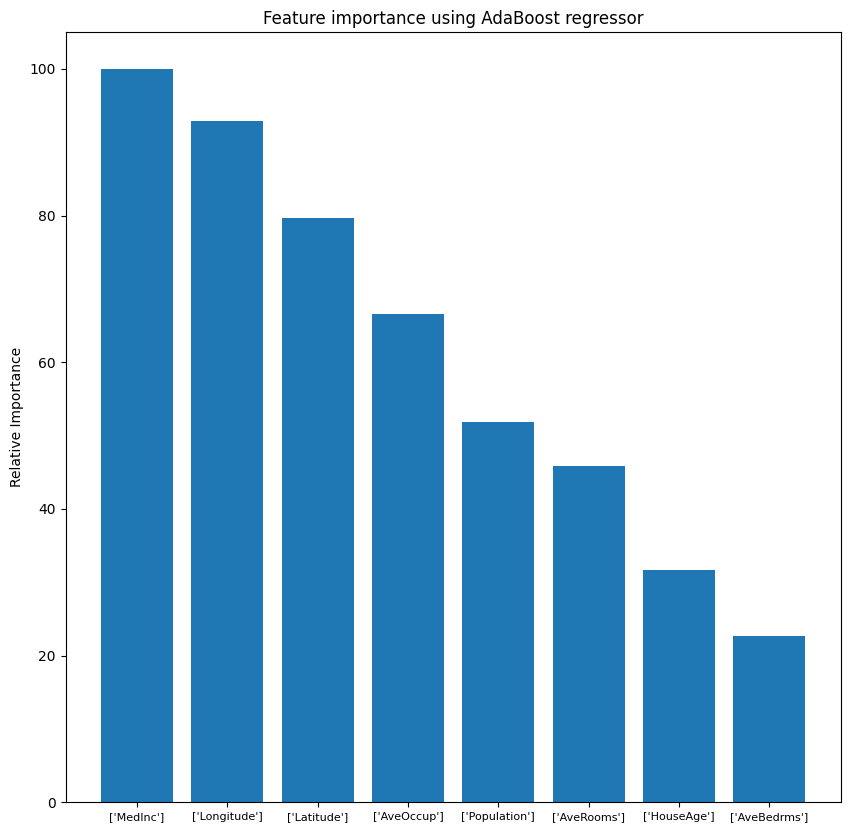

In [5]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
X_cali, y_cali = shuffle(housing_data.data, housing_data.target, random_state=7)
feature_names_cali = housing_data.feature_names
feature_names_cali = np.array(feature_names_cali).reshape((-1, 1))
analyze(X_cali, y_cali, feature_names_cali)